# Part (b): Introduction to Data Analytics
### UE22CS342AA2 - Data Analytics 
- Karthik Namboori - namkarthik2003@gmail.com


The assignment has the below problems:
- Problem 1
- Problem 2
- Problem 3
- Problem 4
- Problem 5
- Problem 6

*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```
*Load a package*

```
library(tidyverse)
```


In [3]:
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# About The Dataset
The below is a sample dataset on the customer satisfaction based on experience from a purchased product.

- CustomerID - Unique identifier of each customer.
- Age: Customers age.
- Gender of the customer.
- Satisfaction Score: On a scale from 1 to 10.
- Purchase Frequency.
- Feedback by the customer.

*Problem 1*

In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. In the customer satisfaction dataset, can you classify the columns with missing data into different categories? (MCAR, MNAR or MAR) (1 point)



In [4]:
# loading the dataset - Upload the dataset under the input tab
# Example snippet
data <- read.csv("/kaggle/input/customer-satisfaction/customer_satisfaction.csv")
data

CustomerID,Age,Gender,SatisfactionScore,PurchaseFrequency,Feedback
<int>,<int>,<chr>,<int>,<int>,<chr>
101,34,M,8,5,Great Product
102,28,F,8,NA,Good service
103,33,M,2,1,
104,45,F,7,5,Excellent
105,30,M,6,NA,Good
106,35,F,1,NA,
107,40,M,3,1,Poor


In [5]:
# Your answer here.
#  Purchase Frequency -> MNAR (Missing Not At Random)
# Feedback -> MAR  or MNAR
#In the given data, PurchaseFrequency and Feedback have missing values.
#In both the coloumns missing data is MCAR, Because the missing data seems to be independent.

# About the dataset

- The below dataset constitute the results of a chemical analysis on wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
- It has been taken from [here](https://archive.ics.uci.edu/dataset/109/wine).

*Features*
- Alcohol: Percentage of alcohol in the wine (vol. %).
- Malic Acid: Concentration of malic acid (g/dm³).
- Ash: Ash content (g/dm³).
- Alcalinity of Ash: Alcalinity of ash (in terms of NaOH) (g/dm³).
- Magnesium: Magnesium content (mg/dm³).
- Total Phenols: Total phenol content (g/dm³).
- Flavanoids: Flavanoid content (g/dm³).
- Nonflavanoid Phenols: Non-flavanoid phenol content (g/dm³).
- Proanthocyanins: Proanthocyanin content (g/dm³).
- Color Intensity: Color intensity of the wine (arbitrary units).
- Hue: Hue of the wine (arbitrary units).
- OD280/OD315 of Diluted Wines: Ratio of optical densities at 280 nm and 315 nm (arbitrary units).
- Proline: Proline content (mg/dm³).

*`Quality`*:
The target class of the alcohol


*Problem 2*

The mean values of the columns `Flavanoids` and `Total_phenols` in the wine dataset are 2.03 and 2.29, respectively. Although these means are nearby, does this imply that the distributions of these two variables are practically equivalent?

To answer this, create a histogram and overlay the probability density curve for each of the 2 variables. Discuss your findings, particularly focusing on the shape and spread of the distributions. Do add a note on the peaks of the histogram. (2 points)



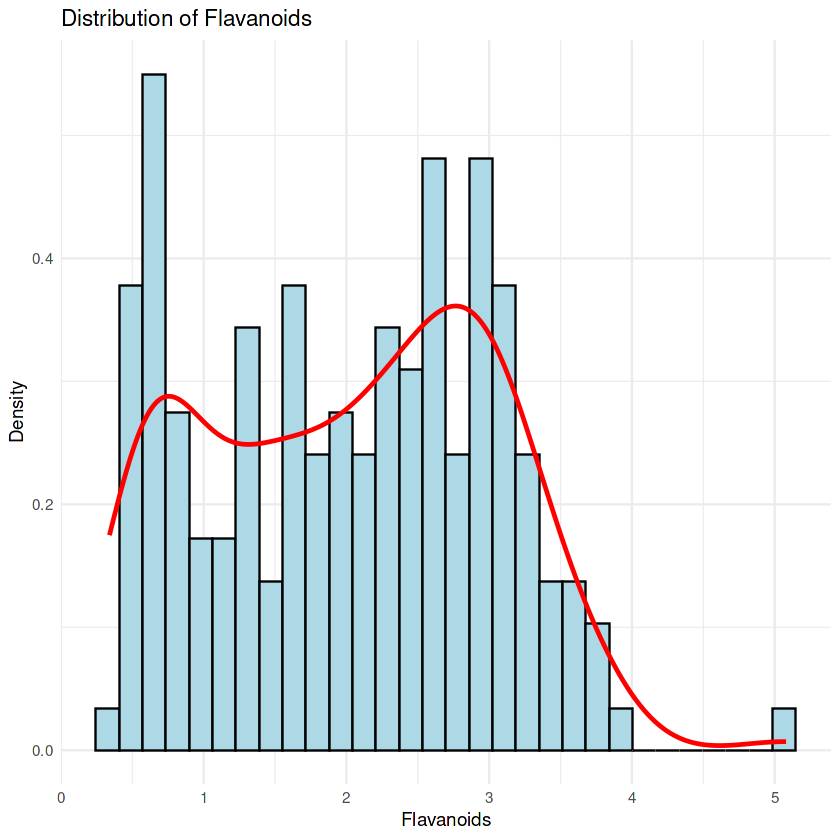

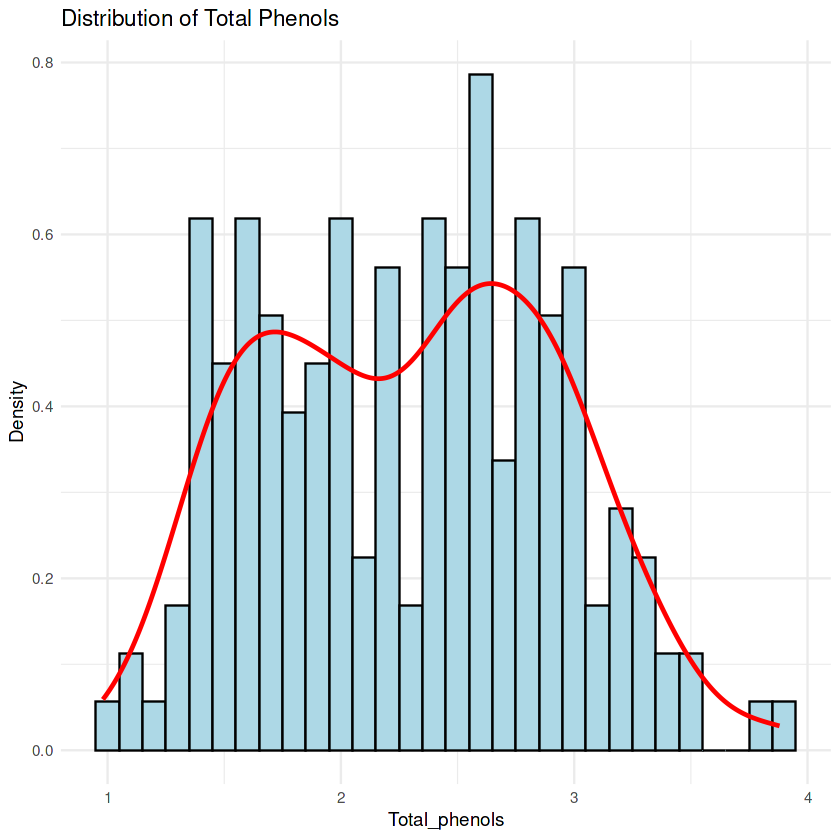

In [9]:
library(ggplot2)
df <- read.csv("/kaggle/input/wine-quality/wine_quality_combined.csv")

# Define a function to create histograms with density curves
Histogram <- function(data, variable, plot_title) {
  ggplot(data, aes(x = !!sym(variable))) +
    geom_histogram(aes(y = after_stat(density)), fill = "lightblue", color = "black", bins = 30) +
    geom_density(color = "red", linewidth = 1) +
    labs(title = plot_title, x = variable, y = "Density") +
    theme_minimal()
}
# Create histograms for Flavanoids and Total Phenols
flavanoids <- Histogram(df, "Flavanoids", "Distribution of Flavanoids")
total_phenols <- Histogram(df, "Total_phenols", "Distribution of Total Phenols")

# Print histograms
print(flavanoids)
print(total_phenols)


In both histograms, the highest concentration of data points falls within the 2.5 to 3 range. However, the density of data points in Total_phenol is greater than in Flavanoids, indicating a higher number of observations in Total_phenol.

Additionally, both distributions exhibit two peaks. For Flavanoids, the second highest peak is observed between the 0.5 to 1 range, whereas for Total_phenol, it appears between the 1.5 to 2 range.

It’s also worth noting that Flavanoids show extreme values, with data points extending beyond the class value of 5.

*Problem 3*

For the different types of quality of alcohol, compare the distributions of its color intensity. Add a note on the outliers and skewness of each category. You can make use of the box plot. (1 + 1 points)



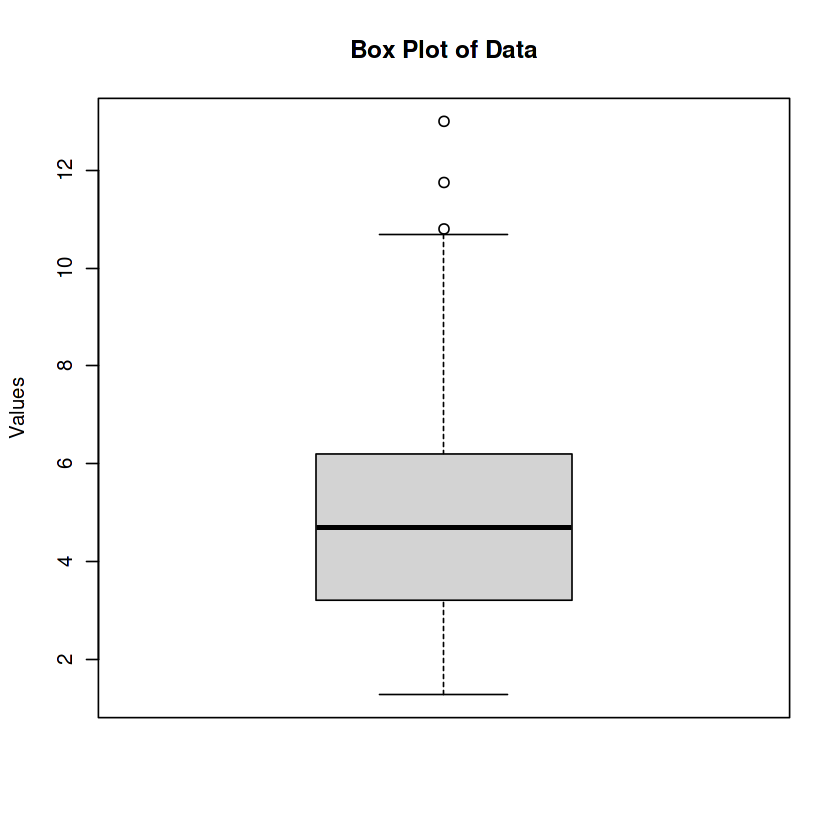

In [13]:
# Your answer here
boxplot(df$Color_intensity, main = "Box Plot of Data", ylab = "Values")
#A few outliers are prsent and teh box polt is positively skewed

*Problem 4*

Explain Dimensionality Reduction. Perform PCA on the dataset and extract the proportion of variance explained by each principal component. How many principal components should be retained based on the `scree plot`? Examine the loadings of the first two principal components. Which variables contribute most to these components? (2 points)

**Hint**:
Scree Plot is a common method for determining the number of PCs to be retained through a graphical representation. A Scree Plot is a simple line segment plot that shows the eigenvalues for each individual PC. 

You can learn more about a scree plot [here](https://sanchitamangale12.medium.com/scree-plot-733ed72c8608)

**Hint**:
In PCA, the contribution of each feature to a principal component is called the `loading`. Loadings are compared with the absolute value



In [14]:
head(data)

,CustomerID,Age,Gender,SatisfactionScore,PurchaseFrequency,Feedback
,<int>,<int>,<chr>,<int>,<int>,<chr>
1,101,34,M,8,5,Great Product
2,102,28,F,8,NA,Good service
3,103,33,M,2,1,
4,104,45,F,7,5,Excellent
5,105,30,M,6,NA,Good
6,106,35,F,1,NA,


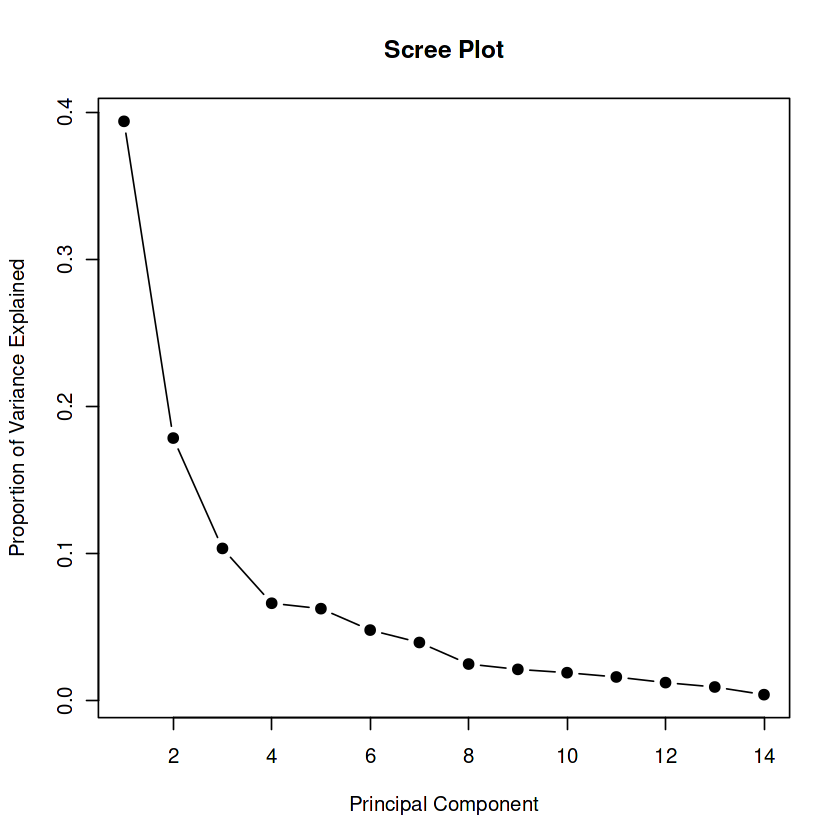

In [11]:
# Your answer here
df_scale <- scale(df)
pca_result <- prcomp(df_scale, center = TRUE, scale. = TRUE)
sdev <- pca_result$sdev
variance_explained <- sdev^2 / sum(sdev^2)
plot(variance_explained, type = "b", main = "Scree Plot",
     xlab = "Principal Component", ylab = "Proportion of Variance Explained",
     pch = 19)
#6 points should retained0




#The first point has more contribution

The first point has more contribution\


*Problem 5* 

Now, for the selected components, find the percentage contribution of each feature to each of the components. (Hint: First find the square of the loadings also known as the cos2 values - find percentage contribution using these values) (2 points)

In [4]:

library(stats)
data(iris)
data_matrix <- as.matrix(iris[, 1:4])
pca_result <- prcomp(data_matrix, scale. = TRUE)
#  loadings 
loadings <- pca_result$rotation
num_components <- min(ncol(loadings), 6) 
loadings_6 <- loadings[, 1:num_components]

#squared loadings 
cos2_values_6 <- loadings_6^2
total_cos2_values <- apply(cos2_values_6, 2, sum)
#normailze
relative_contribution_6 <- sweep(cos2_values_6, 2, total_cos2_values, "/")

# percentage
percentage_contribution_6 <- relative_contribution_6 * 100

print(percentage_contribution_6)


                   PC1         PC2       PC3       PC4
Sepal.Length 27.150969 14.24440565 51.777574  6.827052
Sepal.Width   7.254804 85.24748749  5.972245  1.525463
Petal.Length 33.687936  0.05998389  2.019990 64.232089
Petal.Width  31.906291  0.44812296 40.230191 27.415396


Components with high percentages for specific features indicate that those features are crucial for the variance captured by those components.
Compare the percentages across components to see how the importance of features varies with different components.

*Problem 6*

Generate a plot using the `fviz_pca_var` function to visualize how well each feature is represented by the principal components in the PCA analysis. (Pay attention to the length of the arrows in the fviz_pca_var plot.) (1 point)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


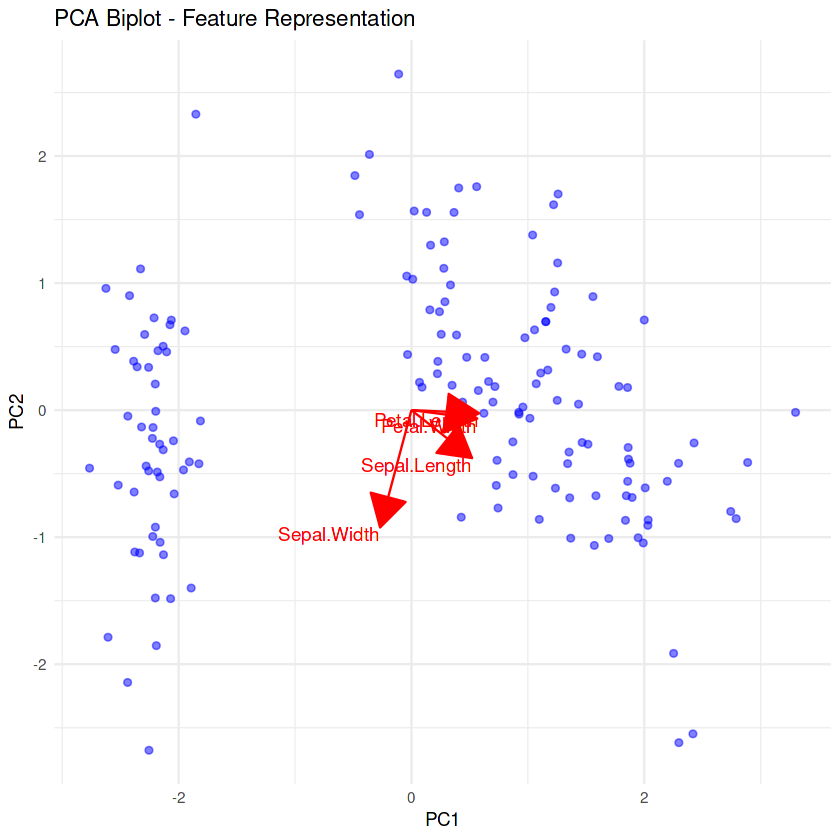

In [6]:
# Your answer here.
# Load necessary libraries
library(tidyverse)
library(ggplot2)

# Example data frame (replace this with your actual data)
df <- iris[, -5]

# Convert data to numeric and scale it
df <- data.frame(lapply(df, as.numeric))
df_scaled <- scale(df)

# Perform PCA
pca_result <- prcomp(df_scaled, center = TRUE, scale. = TRUE)

# Extract PCA scores and loadings
pca_scores <- as.data.frame(pca_result$x)
pca_loadings <- as.data.frame(pca_result$rotation)

# Create a biplot of PCA results
biplot <- ggplot() +
  geom_point(aes(x = pca_scores[,1], y = pca_scores[,2]), color = "blue", alpha = 0.5) +
  geom_segment(data = pca_loadings, aes(x = 0, y = 0, xend = PC1, yend = PC2), 
               arrow = arrow(type = "closed", length = unit(0.3, "inches")), color = "red") +
  geom_text(data = pca_loadings, aes(x = PC1, y = PC2, label = rownames(pca_loadings)), 
            vjust = 1, hjust = 1, color = "red") +
  labs(title = "PCA Biplot - Feature Representation", x = "PC1", y = "PC2") +
  theme_minimal()

# Display the biplot
print(biplot)


In [ ]:
#The biplot approach you provided is a valid method but does not use fviz_pca_var

The biplot approach you provided is a valid method but does not use fviz_pca_varT

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



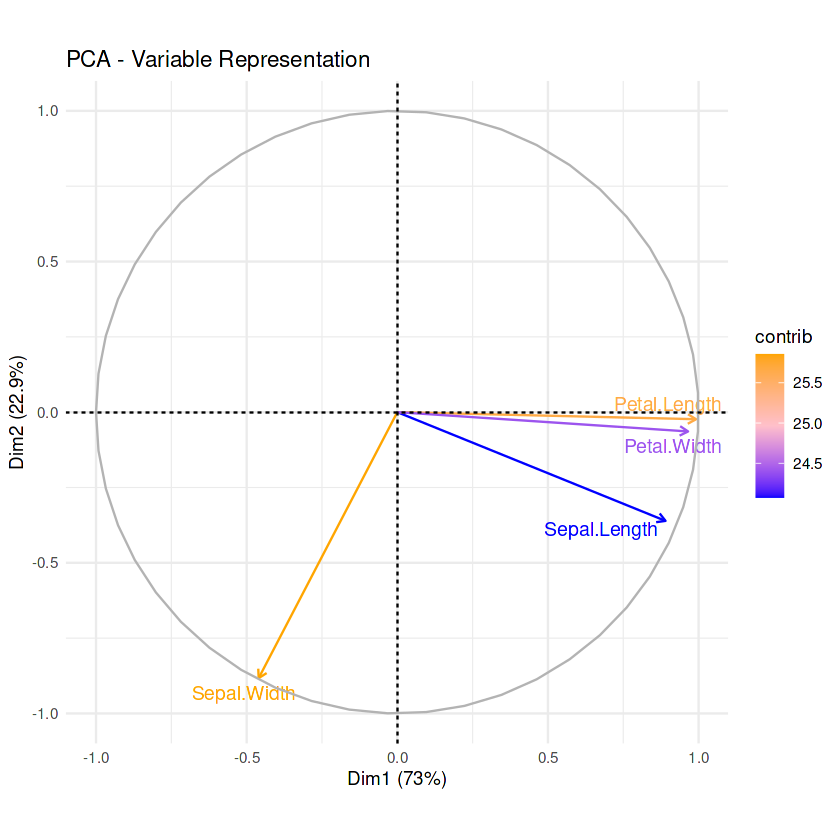

In [7]:
library(factoextra)
library(ggplot2)
df <- iris[, -5]
df <- data.frame(lapply(df, as.numeric))
df_scaled <- scale(df)
# PCA
pca_result <- prcomp(df_scaled, center = TRUE, scale. = TRUE)
#  PCA variable plot
pca_var_plot <- fviz_pca_var(pca_result, 
                             col.var = "contrib",         
                             gradient.cols = c("blue", "pink", "orange"), 
                             repel = TRUE)                

# Customize and display the plot
pca_var_plot + ggtitle("PCA - Variable Representation") +
               theme_minimal()         # Clean theme to minimize clutter


The variables Petal.Length and Petal.Width have longer vectors  which explains  variance. 

PCA is performed at times when the dataset is large. The reduced set takes considerably smaller space and shorter time to train classifiers/ regression models with only making use of the most influential data.

*fin*